In [79]:
import glob
import pandas as pd
g = glob.glob('data/processed_games/[0-9]*.csv')

In [80]:
def _get_strides(g):
    g['bigram'] = g.court_location.shift(1)+g.court_location
    return g

# note: not robust for turnovers
def _get_pos_label(g):
    try:
        pos_team = g[(g.of_def_flag == "of")]['team_id'].value_counts().idxmax()
    except:
        pos_team = None
    g['team_in_possession'] = pos_team
    return g
    

In [81]:
total_counts = None
for n in g:
    print(n)
    df = pd.read_csv(n)
    df = df.groupby('game_clock').apply(_get_pos_label)
    df = df[df.player_id == -1]
        
    df_sorted = df.sort_values('game_clock')
    df_sorted['court_location'] = df_sorted['court_location'].apply(lambda x: (x,) if x is not None else None)
    df_balls = df_sorted[df_sorted.player_id == -1]
    df_bigrams = df_balls.groupby(['event_id']).apply(_get_strides)
    df = df_bigrams[['team_in_possession', 'bigram']]
    df = df.dropna()
    df_counts = df.groupby(['team_in_possession', 'bigram']).size()
    
    if total_counts is None:
        total_counts = df_counts  
    else:
        total_counts = total_counts.add(df_counts, fill_value=0.0)
        print(len(total_counts.index))  
    

data/processed_games/0021500001.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (24,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data/processed_games/0021500002.csv
454
data/processed_games/0021500003.csv
681
data/processed_games/0021500004.csv
928
data/processed_games/0021500005.csv
1156
data/processed_games/0021500007.csv
1275
data/processed_games/0021500009.csv
1491
data/processed_games/0021500010.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (20,34,36,37,38,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1734
data/processed_games/0021500011.csv
1857
data/processed_games/0021500012.csv
2082
data/processed_games/0021500013.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,24,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2305
data/processed_games/0021500015.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2439
data/processed_games/0021500016.csv
2670
data/processed_games/0021500017.csv
2898
data/processed_games/0021500018.csv
2928
data/processed_games/0021500019.csv
2960
data/processed_games/0021500020.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,24,34,36,37,38,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3077
data/processed_games/0021500021.csv
3205
data/processed_games/0021500022.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (24,41,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3226
data/processed_games/0021500023.csv
3257
data/processed_games/0021500024.csv
3286
data/processed_games/0021500025.csv
3306
data/processed_games/0021500026.csv
3430
data/processed_games/0021500027.csv
3466
data/processed_games/0021500028.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3597
data/processed_games/0021500029.csv
3620
data/processed_games/0021500031.csv
3655
data/processed_games/0021500032.csv
3785
data/processed_games/0021500033.csv
3799
data/processed_games/0021500034.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (24,34,36,37,38,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3811
data/processed_games/0021500035.csv
3837
data/processed_games/0021500036.csv
3858
data/processed_games/0021500037.csv
3872
data/processed_games/0021500038.csv
3896
data/processed_games/0021500039.csv
3915
data/processed_games/0021500040.csv
3930
data/processed_games/0021500041.csv
3957
data/processed_games/0021500042.csv
3972
data/processed_games/0021500043.csv
3994
data/processed_games/0021500044.csv
4005
data/processed_games/0021500045.csv
4032
data/processed_games/0021500046.csv
4041
data/processed_games/0021500047.csv
4058
data/processed_games/0021500048.csv
4066
data/processed_games/0021500049.csv
4076
data/processed_games/0021500050.csv
4085
data/processed_games/0021500051.csv
4097
data/processed_games/0021500052.csv
4119
data/processed_games/0021500053.csv
4131
data/processed_games/0021500054.csv
4146
data/processed_games/0021500055.csv
4161
data/processed_games/0021500056.csv
4165
data/processed_games/0021500057.csv
4177
data/processed_games/0021500058.csv
4185
data/proces

/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,24,34,36,37,38,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4259
data/processed_games/0021500068.csv
4273
data/processed_games/0021500069.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,24,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4285
data/processed_games/0021500070.csv
4289
data/processed_games/0021500071.csv
4299
data/processed_games/0021500072.csv
4304
data/processed_games/0021500073.csv
4313
data/processed_games/0021500074.csv
4319
data/processed_games/0021500075.csv
4328
data/processed_games/0021500076.csv
4341
data/processed_games/0021500077.csv
4350
data/processed_games/0021500078.csv
4356
data/processed_games/0021500079.csv
4365
data/processed_games/0021500080.csv
4372
data/processed_games/0021500081.csv
4375
data/processed_games/0021500082.csv
4390
data/processed_games/0021500083.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (20,24,34,36,37,38,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4399
data/processed_games/0021500084.csv
4406
data/processed_games/0021500085.csv
4412
data/processed_games/0021500086.csv
4415
data/processed_games/0021500087.csv
4423
data/processed_games/0021500088.csv
4434
data/processed_games/0021500089.csv
4438
data/processed_games/0021500090.csv
4439
data/processed_games/0021500091.csv
4446
data/processed_games/0021500092.csv
4447
data/processed_games/0021500093.csv
4450
data/processed_games/0021500094.csv
4453
data/processed_games/0021500095.csv
4458
data/processed_games/0021500096.csv
4464
data/processed_games/0021500097.csv
4471
data/processed_games/0021500098.csv
4475
data/processed_games/0021500099.csv
4479
data/processed_games/0021500101.csv
4484
data/processed_games/0021500102.csv
4487
data/processed_games/0021500103.csv
4491
data/processed_games/0021500104.csv
4501
data/processed_games/0021500105.csv
4506
data/processed_games/0021500106.csv
4510
data/processed_games/0021500107.csv
4515
data/processed_games/0021500108.csv
4520
data/proces

/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (20,22,24,27,29,30,31,34,36,37,38,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4661
data/processed_games/0021500150.csv
4666
data/processed_games/0021500151.csv
4668
data/processed_games/0021500152.csv
4669
data/processed_games/0021500153.csv
4672
data/processed_games/0021500154.csv
4679
data/processed_games/0021500155.csv
4684
data/processed_games/0021500156.csv
4689
data/processed_games/0021500157.csv
4691
data/processed_games/0021500158.csv
4693
data/processed_games/0021500159.csv
4699
data/processed_games/0021500160.csv
4700
data/processed_games/0021500161.csv
4705
data/processed_games/0021500162.csv
4705
data/processed_games/0021500163.csv
4708
data/processed_games/0021500164.csv
4709
data/processed_games/0021500165.csv
4710
data/processed_games/0021500166.csv
4711
data/processed_games/0021500167.csv
4714
data/processed_games/0021500168.csv
4715
data/processed_games/0021500169.csv
4718
data/processed_games/0021500170.csv
4721
data/processed_games/0021500171.csv
4722
data/processed_games/0021500172.csv


/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,34,36,37,38,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4722
data/processed_games/0021500173.csv
4723
data/processed_games/0021500174.csv
4724
data/processed_games/0021500175.csv
4726
data/processed_games/0021500176.csv
4726
data/processed_games/0021500177.csv
4730
data/processed_games/0021500178.csv
4730
data/processed_games/0021500179.csv
4733
data/processed_games/0021500180.csv
4737
data/processed_games/0021500181.csv
4737
data/processed_games/0021500182.csv
4738
data/processed_games/0021500183.csv
4739
data/processed_games/0021500184.csv
4740
data/processed_games/0021500185.csv
4743
data/processed_games/0021500186.csv
4743
data/processed_games/0021500187.csv
4745
data/processed_games/0021500188.csv
4747
data/processed_games/0021500189.csv
4748
data/processed_games/0021500190.csv
4749
data/processed_games/0021500191.csv
4750
data/processed_games/0021500192.csv
4753
data/processed_games/0021500193.csv
4754
data/processed_games/0021500194.csv
4758
data/processed_games/0021500195.csv
4761
data/processed_games/0021500196.csv
4762
data/proces

/Users/sam/miniconda3/envs/data_cleaning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (20,24,41,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4804
data/processed_games/0021500219.csv
4807
data/processed_games/0021500220.csv
4811
data/processed_games/0021500221.csv
4812
data/processed_games/0021500222.csv
4813
data/processed_games/0021500223.csv
4814
data/processed_games/0021500224.csv
4815
data/processed_games/0021500225.csv
4815
data/processed_games/0021500226.csv
4818
data/processed_games/0021500227.csv
4822
data/processed_games/0021500228.csv
4823
data/processed_games/0021500229.csv
4827
data/processed_games/0021500230.csv
4828
data/processed_games/0021500231.csv
4830
data/processed_games/0021500232.csv
4833
data/processed_games/0021500233.csv
4834
data/processed_games/0021500234.csv
4834
data/processed_games/0021500235.csv
4837
data/processed_games/0021500236.csv
4842
data/processed_games/0021500237.csv
4847
data/processed_games/0021500239.csv
4849
data/processed_games/0021500241.csv
4851
data/processed_games/0021500242.csv
4852
data/processed_games/0021500243.csv
4854
data/processed_games/0021500244.csv
4854
data/proces

KeyboardInterrupt: 

In [1]:
total_counts.to_csv("data/processed_counts_pca.csv")

NameError: name 'total_counts' is not defined

In [73]:
import pandas as pd
total_counts = pd.read_csv('data/processed_counts_pca.csv', header=None)
total_counts[1] = total_counts[1].apply(lambda x: eval(str(x)))
total_counts = total_counts.set_index([0, 1]).iloc[:,0]
# total_counts = total_counts[]

In [74]:
mi0 = pd.MultiIndex.from_tuples(tuple([(t, tup[0], tup[1]) for t, tup in list(total_counts.index) ]))
total_counts.index = (mi0)

In [75]:
# this gives us the counts of how many half seconds the ball was
# in each of the different court positions
total_counts.reset_index()[['level_1', 2]].groupby('level_1').count()

,2
level_1,
2.0,382
3.0,310
4.0,235
6.0,385
7.0,312
8.0,231
9.0,420
10.0,405
11.0,373


In [76]:
choice_loc = 9.0
total_counts_one_loc = total_counts.xs(choice_loc, level=2)
# labels[9.0]

In [77]:
mi = pd.MultiIndex.from_tuples(tuple([((team, choice_loc), to_loc) for team, to_loc in list(total_counts_one_loc.index) ]))
total_counts_one_loc.index = (mi)

In [85]:
# for the total matrix:
# mi = pd.MultiIndex.from_tuples(tuple([((t, tup[0]), tup[1]) for t, tup in list(total_counts.index) ]))
# total_counts.index = (mi)
total_counts_one_loc

(-1, 9.0)          2.0        10.0
                   7.0         1.0
                   9.0        31.0
(1610612737, 9.0)  2.0      1354.0
                   3.0        82.0
                   6.0      1376.0
                   7.0        61.0
                   8.0        13.0
                   9.0     17410.0
                   10.0     1764.0
                   11.0      178.0
                   12.0       12.0
                   15.0      118.0
                   16.0        9.0
                   19.0      124.0
                   20.0       22.0
(1610612738, 9.0)  2.0      1172.0
                   3.0        59.0
                   6.0      1243.0
                   7.0        59.0
                   8.0         2.0
                   9.0     15751.0
                   10.0     1582.0
                   11.0      108.0
                   12.0       17.0
                   15.0      103.0
                   16.0       10.0
                   19.0      106.0
                   2

In [79]:
mat = total_counts_one_loc.unstack(fill_value = 0.0)

In [80]:
dictionary_1 = {'Right Side(R)':1, 'Left Side(L)':2, 'Center(C)':3, 
                'Right Side Center(RC)':4, 'Left Side Center(LC)':5}
dictionary_2 = {'Less Than 8 ft.':1, '8-16 ft.':2, '16-24 ft.':3, '24+ ft.':4}

d1 = {v: k for k, v in dictionary_1.items()}
d2 = {v: k for k, v in dictionary_2.items()}

j = 1
labels = {}
reverse_labels = {}
for c in mat.columns:
    i=int((c//4.1))+1
#     print ("c: {c} i: {i} j: {j}".format(c=c, 
#                                          i=i, 
#                                          j=j))
    labels[c] = d1[i]+", "+d2[j]
    reverse_labels[labels[c]] = c
    j+=1
    if j > 4:
        j = 1

mat = mat.rename(mapper=labels, axis='columns')

mi = pd.MultiIndex.from_tuples(tuple([(t, labels[p]) for t, p in mat.index]))
mat.index = mi

In [81]:
mat_ps = mat.div(mat.sum(axis=1), axis=0)

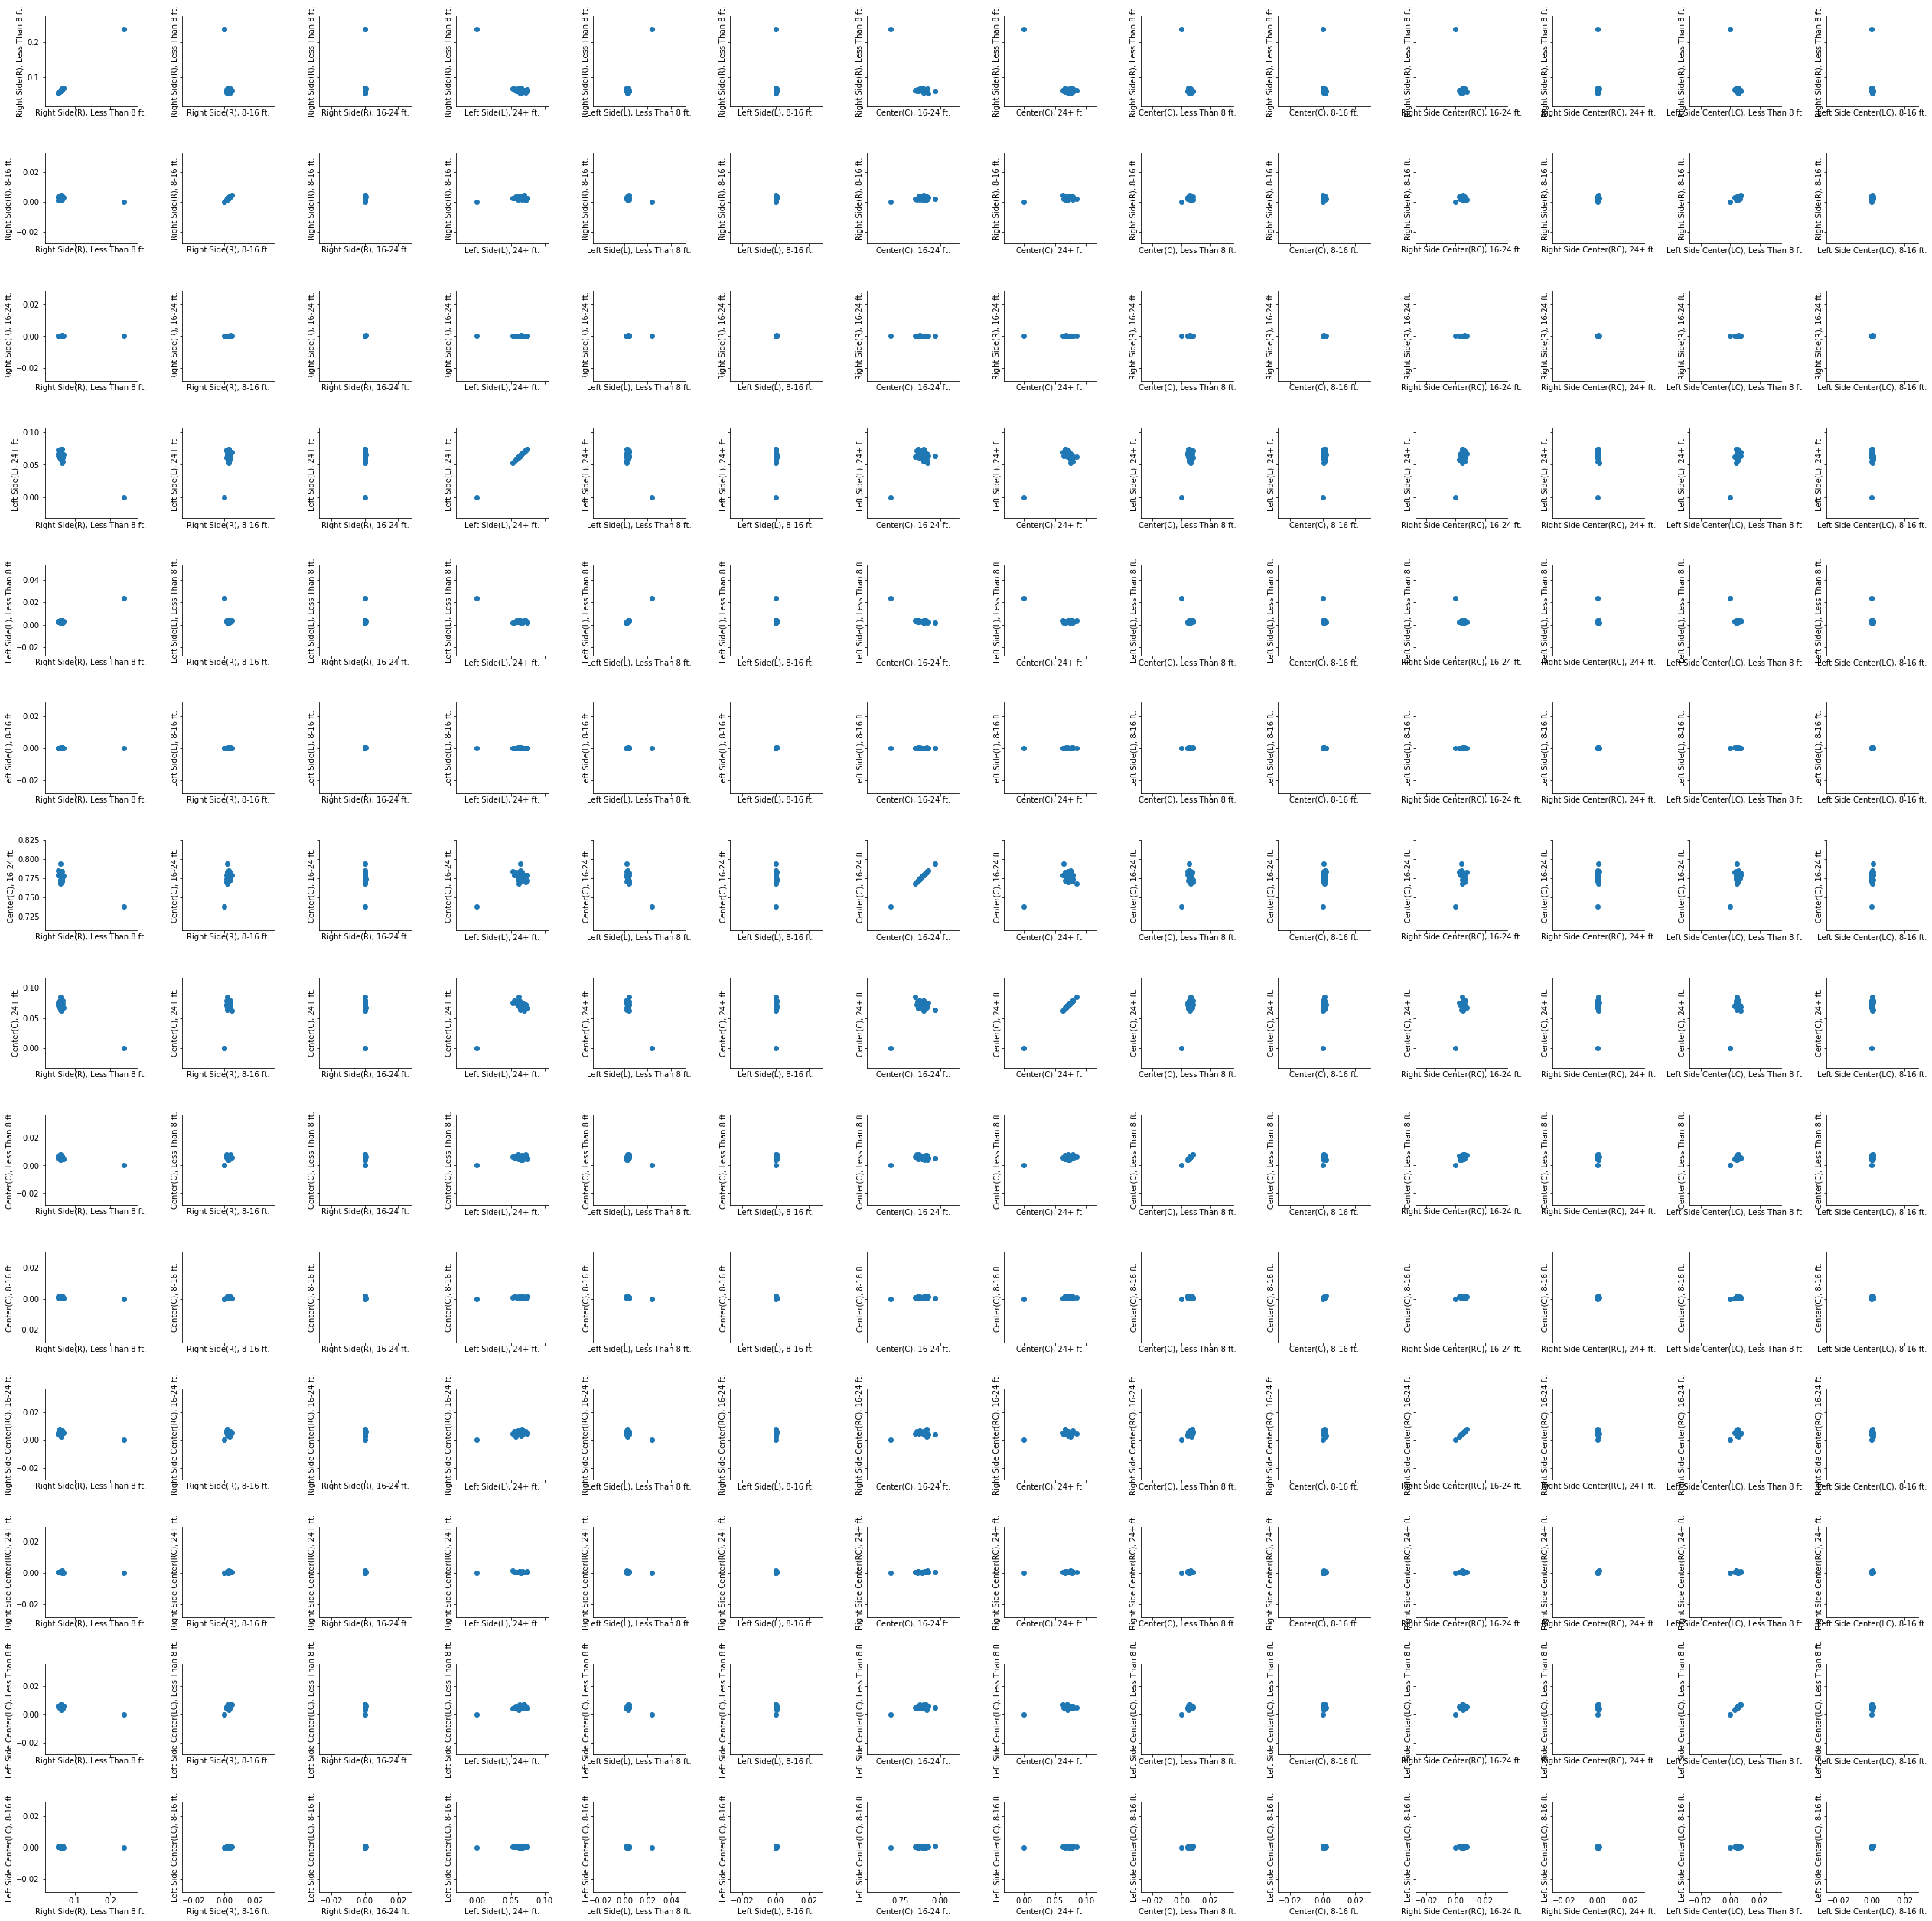

In [82]:
%matplotlib inline
# g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
# g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.PairGrid(mat_ps)
g = g.map(plt.scatter);

xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

plt.show()

In [88]:
g.savefig("pairwise.png")

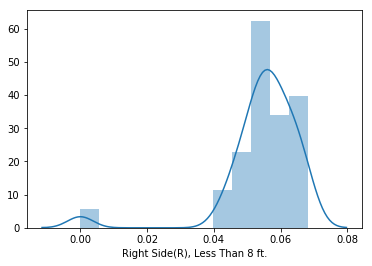

In [31]:
import seaborn as sns, numpy as np

sns.distplot(mat_ps['Right Side(R), Less Than 8 ft.'])

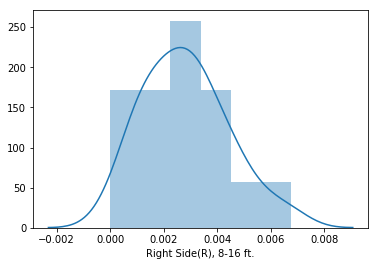

In [32]:
sns.distplot(mat_ps['Right Side(R), 8-16 ft.'])

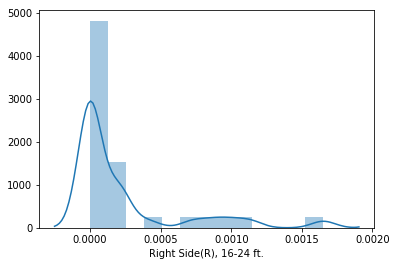

In [33]:
sns.distplot(mat_ps['Right Side(R), 16-24 ft.'])

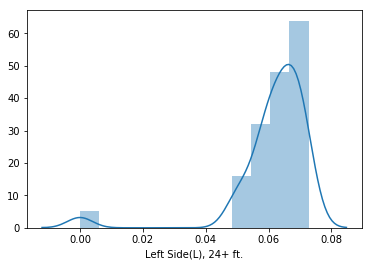

In [34]:
sns.distplot(mat_ps['Left Side(L), 24+ ft.'])

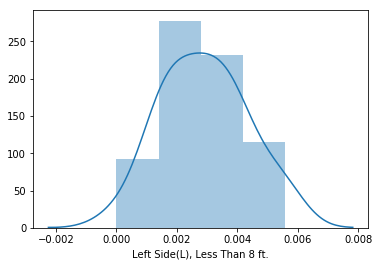

In [44]:
se = mat_ps['Left Side(L), Less Than 8 ft.']
sns.distplot(se)

In [36]:
mat_ps['Right Side Center(RC), 16-24 ft.']

-1           Center(C), 24+ ft.    0.000000
 1610612737  Center(C), 24+ ft.    0.075686
 1610612738  Center(C), 24+ ft.    0.072831
 1610612739  Center(C), 24+ ft.    0.056275
 1610612740  Center(C), 24+ ft.    0.072064
 1610612741  Center(C), 24+ ft.    0.064686
 1610612742  Center(C), 24+ ft.    0.085653
 1610612743  Center(C), 24+ ft.    0.071348
 1610612744  Center(C), 24+ ft.    0.075599
 1610612745  Center(C), 24+ ft.    0.072477
 1610612746  Center(C), 24+ ft.    0.053973
 1610612747  Center(C), 24+ ft.    0.054294
 1610612748  Center(C), 24+ ft.    0.065265
 1610612749  Center(C), 24+ ft.    0.068409
 1610612750  Center(C), 24+ ft.    0.072908
 1610612751  Center(C), 24+ ft.    0.067523
 1610612752  Center(C), 24+ ft.    0.062922
 1610612753  Center(C), 24+ ft.    0.078515
 1610612754  Center(C), 24+ ft.    0.078061
 1610612755  Center(C), 24+ ft.    0.074516
 1610612756  Center(C), 24+ ft.    0.072991
 1610612757  Center(C), 24+ ft.    0.061843
 1610612758  Center(C), 24+ ft. 

In [37]:
from sklearn.decomposition import PCA, FactorAnalysis

X = mat_ps
pca = PCA()
X_r = pca.fit(X).transform(X)

In [38]:
pca.singular_values_

array([7.03344863e-01, 9.58806014e-02, 8.23091614e-02, 5.22090638e-02,
       4.52697252e-02, 2.99276235e-02, 2.51869455e-02, 1.73358311e-02,
       1.07351650e-02, 7.53124591e-03, 5.14589360e-03, 1.93743416e-03,
       1.47839757e-03, 3.44972570e-17])

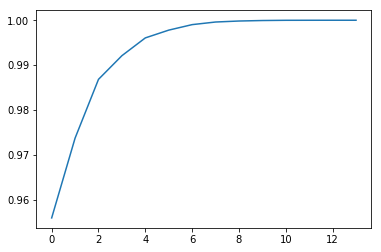

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [40]:
import numpy as np
# X_corr = np.corrcoef(X)
fa = FactorAnalysis()
X_fa_r = fa.fit(X).transform(X)

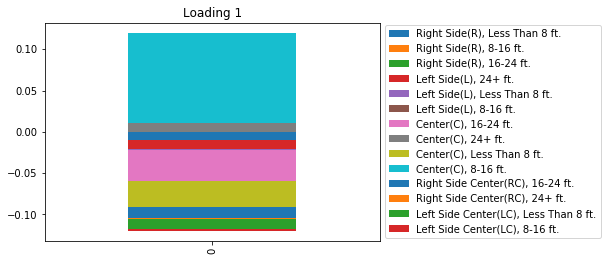

In [41]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
se = pd.DataFrame(fa.components_[0], index = X.columns)
f = plt.figure()
plt.title('Loading 1', color='black')
se.T.plot(kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

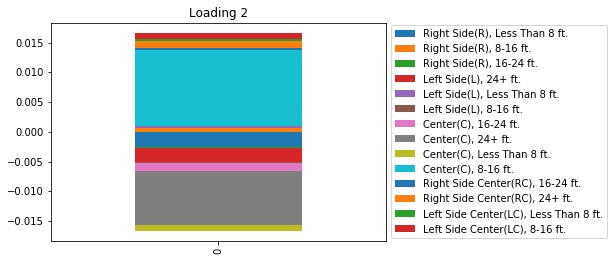

In [42]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
se = pd.DataFrame(fa.components_[1], index = X.columns)
f = plt.figure()
plt.title('Loading 2', color='black')
se.T.plot(kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

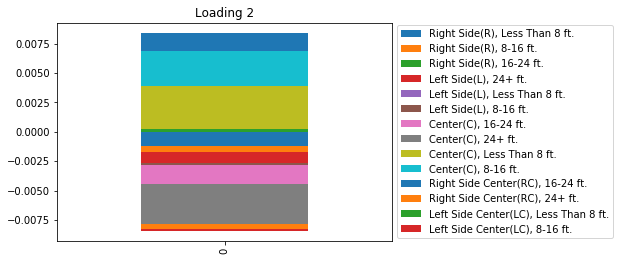

In [43]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
se = pd.DataFrame(fa.components_[2], index = X.columns)
f = plt.figure()
plt.title('Loading 2', color='black')
se.T.plot(kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [97]:
fa.noise_variance_

array([0.00779477, 0.00721374, 0.00566058, 0.00790135, 0.00732081,
       0.00525773, 0.02437651, 0.00341051, 0.00323373, 0.02315338,
       0.00445321, 0.02006729, 0.0044617 , 0.01975523])

NameError: name 'n' is not defined

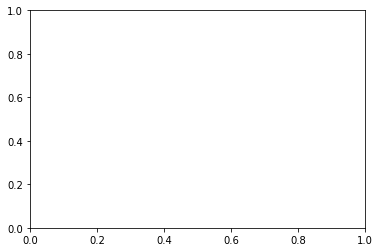

In [89]:
ind = np.arange(len(fa.components_))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

bar_locations = np.arange(n)
ax.bar(ind, data1)
ax.bar(ind, data2, bottom=data1, color='r')

fig.show()


In [71]:
pca.components_[0]**2

array([2.96832183e-04, 7.32578094e-04, 4.18239257e-03, 1.37206662e-03,
       1.17369690e-03, 1.19774122e-04, 1.79824268e-06, 2.77064472e-05,
       1.34772689e-03, 1.24968690e-03, 1.27949377e-03, 2.96724522e-03,
       4.56822142e-03, 3.32263526e-03, 2.64355645e-03, 5.18433907e-03,
       3.71164123e-03, 8.13529352e-06, 3.44194001e-05, 2.16586964e-07,
       3.53479673e-07, 4.05243092e-03, 1.40117006e-03, 4.46206997e-03,
       1.47615789e-03, 2.79354585e-03, 4.83854902e-03, 3.34175561e-03,
       2.71497603e-03, 5.14923450e-03, 3.95208004e-03, 8.17691227e-06,
       9.81984482e-06, 9.41635842e-07, 1.13627673e-06, 3.98084561e-03,
       1.43179441e-03, 3.95203616e-03, 1.49926014e-03, 2.86875200e-03,
       4.45091267e-03, 3.35951956e-03, 2.24776466e-03, 4.68422252e-03,
       2.82085476e-03, 1.33750338e-05, 2.00723757e-05, 3.69896661e-09,
       2.04245075e-06, 3.80697240e-03, 1.41783842e-03, 4.58502789e-03,
       1.55097967e-03, 2.55373594e-03, 4.58920156e-03, 2.96641081e-03,
      